# Tâche 9: vitesse de son dans les branches accoustiques

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import * 
import matplotlib.pyplot as plt

In [2]:
# Récupération de la structure (bande)
with MPRester("m4UKTJ8LxatvzyEV") as m:
    structure = m.get_phonon_bandstructure_by_material_id("mp-505297")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



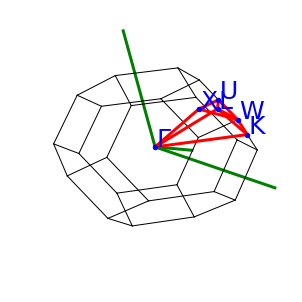

In [3]:
# Zone de brillouin
PhononBSPlotter(structure).plot_brillouin()

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

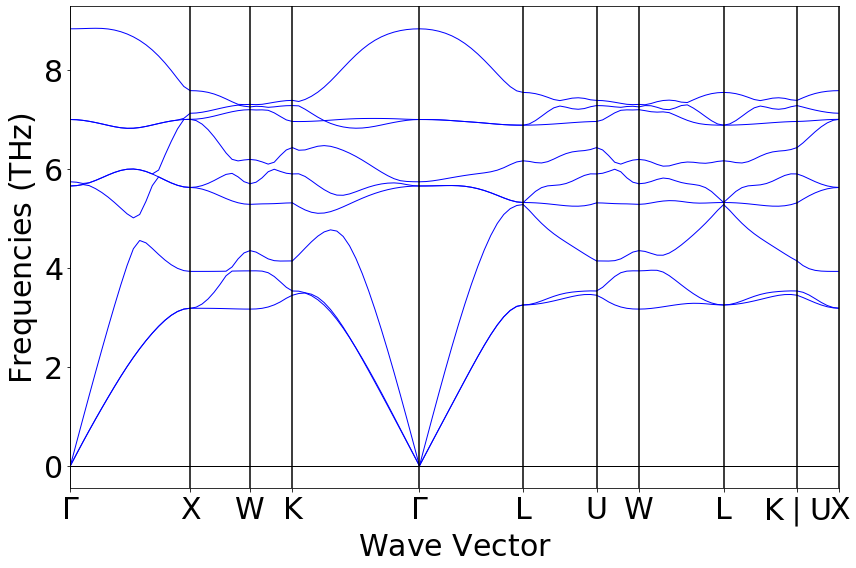

In [4]:
# Visualisation
PhononBSPlotter(structure).get_plot()

## Bande accoustique
La première chose à déterminer est de savoir qu'elles sont les bandes accoustiques. Celles-ci correspondent aux bandes où la fréquence du phonon associée est nulle au centre de la zone de Brillouin. Concrètement, nous avons donc trois possibilités: la direction $\Gamma - X$, $K - \Gamma$ et $\Gamma - L$. 

## Vitesse du son
Dans un solide, la vitesse de propagation du son correspond à la propagation d'un phonon dans le réseau réciproque (et donc la zone de Brillouin). Cette vitesse étant anisotrope, on peut s'attendre à voir des changements de vitesse important entre les vitesses déterminées pour chaque direction. 


La vitesse du son est liée au vecteur d'onde $q$ par la relation suivante: $v_s = \frac{\partial \omega}{\partial q}$ où $\omega$ est la relation de dispersion de notre matériau en posant comme hypothèse que nous sommes dans le cas de grande longueur d'onde ($\lambda >> a$ avec $a$ le paramètre de maille) afin d'avoir une relation linéaire. Pour obtenir la vitesse du son, il nous suffit dès lors de récupérer la pente de cette approximation linéaire pour de petits vecteurs d'onde $q$ sur notre diagramme de bandes précédent. Etant donné que le diagramme nous donne des fréquences en TerraHertz, il va de plus falloir reconvertir cette dernière en Hz pour après obtenir $\omega$. Notre vecteur d'onde (actuellement en Angström) est également à modifier étant donné que nous souhaitons une vitesse en \[m/s\]. 

In [5]:
# Récupération de nos données
data = PhononBSPlotter(structure).bs_plot_data()

frequency = data['frequency']
ticks = data['ticks']
distances = data['distances']

### Première bande accoustique $\Gamma - X$


In [6]:
# Première direction
vitesse_son_1 = 2*np.pi*np.abs((frequency[0][1][1]-frequency[0][1][0])*(10**12))/((distances[0][1]-distances[0][0])*(10**10))
print("La vitesse du son de la courbe 1 dans la direction Gamma - X vaut {} m/s.".format(vitesse_son_1))

La vitesse du son de la courbe 1 dans la direction Gamma - X vaut 2821.5224124277474 m/s.


### Deuxième bande accoustique $K - \Gamma$

In [7]:
vitesse_son_2 = 2*np.pi*np.abs((frequency[3][0][-1] - frequency[3][0][-2])*(10**12))/((distances[3][-1]-distances[3][-2])*(10**10))
print("La vitesse du son de la courbe 2 dans la direction K - Gamma vaut {} m/s.".format(vitesse_son_2))

La vitesse du son de la courbe 2 dans la direction K - Gamma vaut 2806.21620866215 m/s.


### Troisième bande accoustique $\Gamma - L$

In [8]:
vitesse_son_3 = 2*np.pi*np.abs((frequency[4][2][1]-frequency[4][2][0])*(10**12))/((distances[4][1]-distances[4][0])*(10**10))
print("La vitesse du son de la courbe 3 dans la direction Gamma - L vaut {} m/s.".format(vitesse_son_3))

La vitesse du son de la courbe 3 dans la direction Gamma - L vaut 5589.240078817245 m/s.


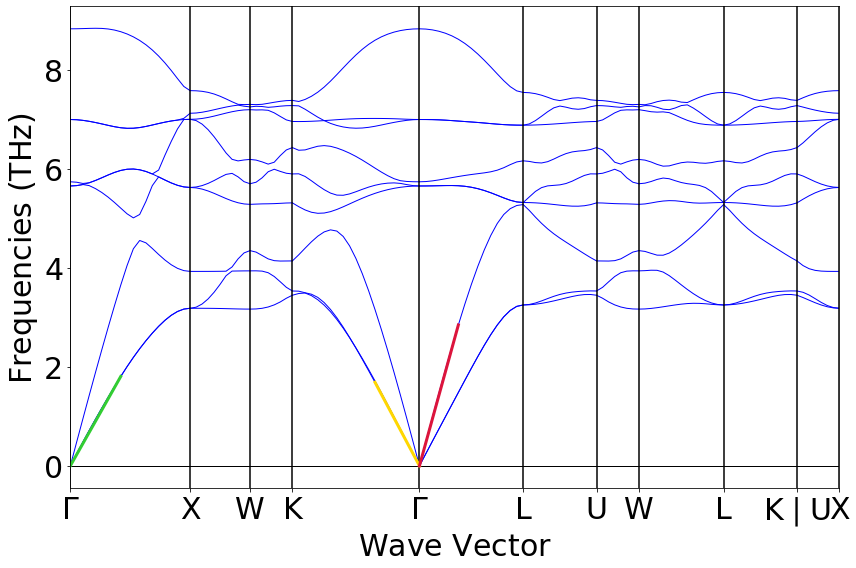

In [9]:
PhononBSPlotter(structure).get_plot()

# Première pente en vert
plt.plot([distances[0][0],distances[0][0]+distances[0][8]-distances[0][0]],[frequency[0][1][0],frequency[0][1][0]+frequency[0][1][8]-frequency[0][1][0]], color='limegreen', lw=3)
# Deuxième pente en jaune
plt.plot([distances[3][13],distances[3][13]+distances[3][-1]-distances[3][13]],[frequency[3][0][13],frequency[3][0][13]+frequency[3][0][-1]-frequency[3][0][13]], color='gold', lw=3)
# Troisième pente en rouge
plt.plot([distances[4][0], distances[4][0]+distances[4][6]-distances[4][0]],[frequency[4][2][0],frequency[4][2][0]+frequency[4][2][6]-frequency[4][2][0]], color='crimson', lw=3)

Nos valeurs semblent cohérentes au vu des pentes. Les lignes vertes et jaunes se ressemblent au niveau de l'inclinaison et elles donnent toutes les deux des vitesses de l'ordre de 2 km/s. La pente rouge est quant à elle bien plus forte et on retrouve alors une vitesse de plus de 5 km/s associée. 


Ces vitesses sont d'un ordre de grandeur correct étant donné que nous sommes bien face à des valeurs supérieures à la vitesse du son dans l'air (1224 m/s) et bien inférieure à celle dans le diamant (qui est la vitesse maximale)(12 000 m/s). 